In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
# Load the data
data = pd.read_csv('customer_data_records.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

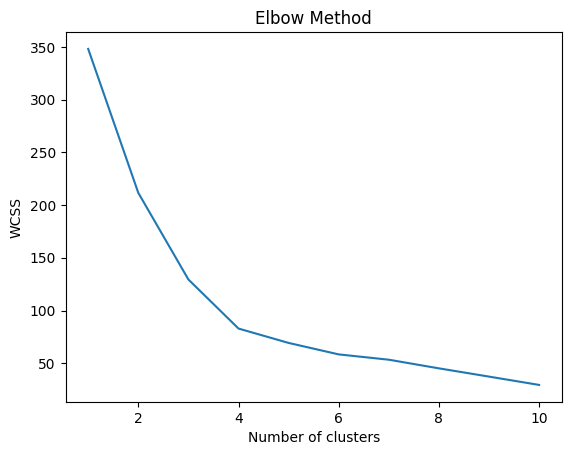

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

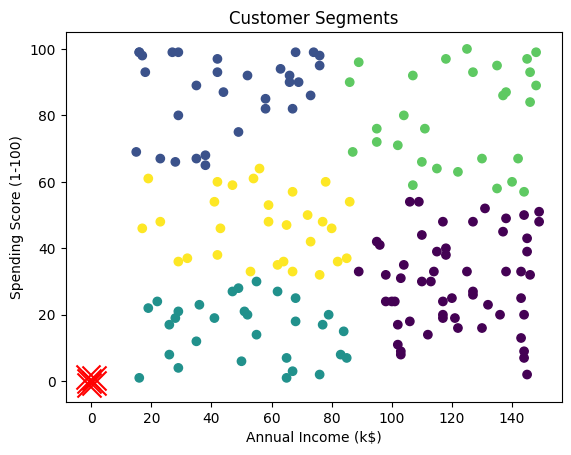

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data['Cluster'] = clusters

# Visualize the clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [13]:
cluster_stats = data.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
    'CustomerID': 'count'
})

print(cluster_stats)

        Annual Income (k$)                     Spending Score (1-100)  \
                      mean        std min  max                   mean   
Cluster                                                                 
0               121.600000  17.379852  89  149              29.818182   
1                45.387097  20.624706  15   76              86.903226   
2                51.500000  21.306871  16   85              15.533333   
3               121.862069  20.467263  86  148              79.413793   
4                56.896552  20.217293  17   86              46.793103   

                            CustomerID  
               std min  max      count  
Cluster                                 
0        13.722232   2   54         55  
1        11.719940  65   99         31  
2         8.869682   1   30         30  
3        14.398703  57  100         29  
4        10.072520  32   64         29  
